
(12026, 17)



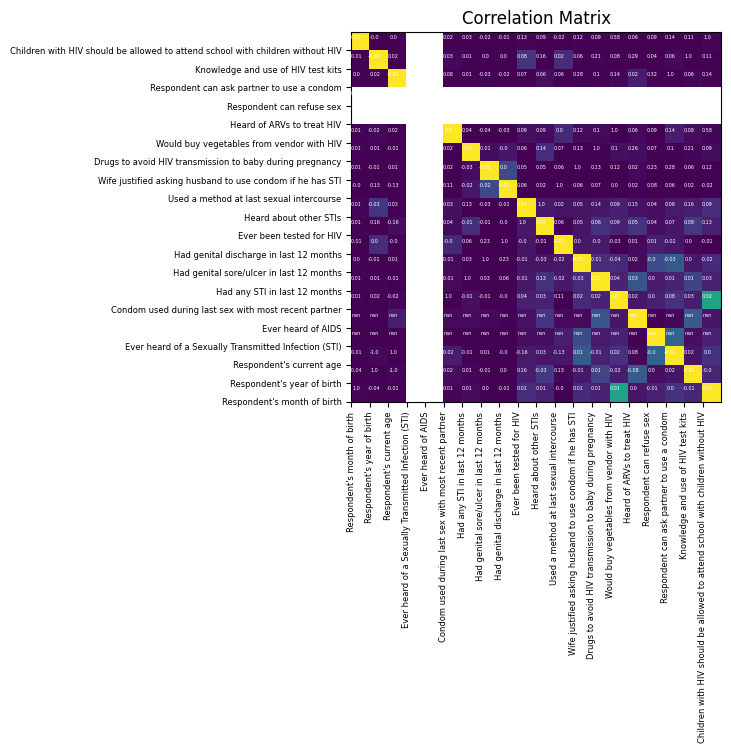

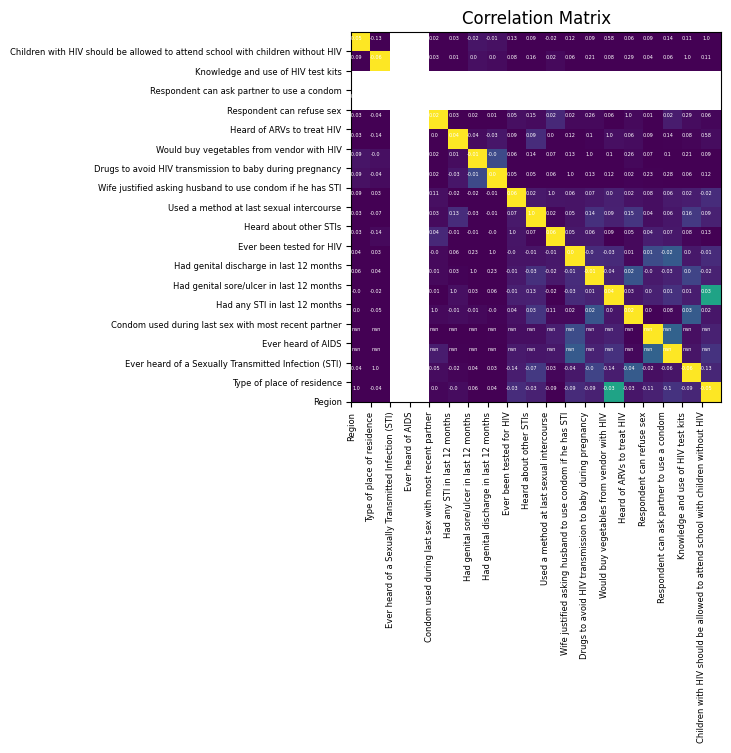

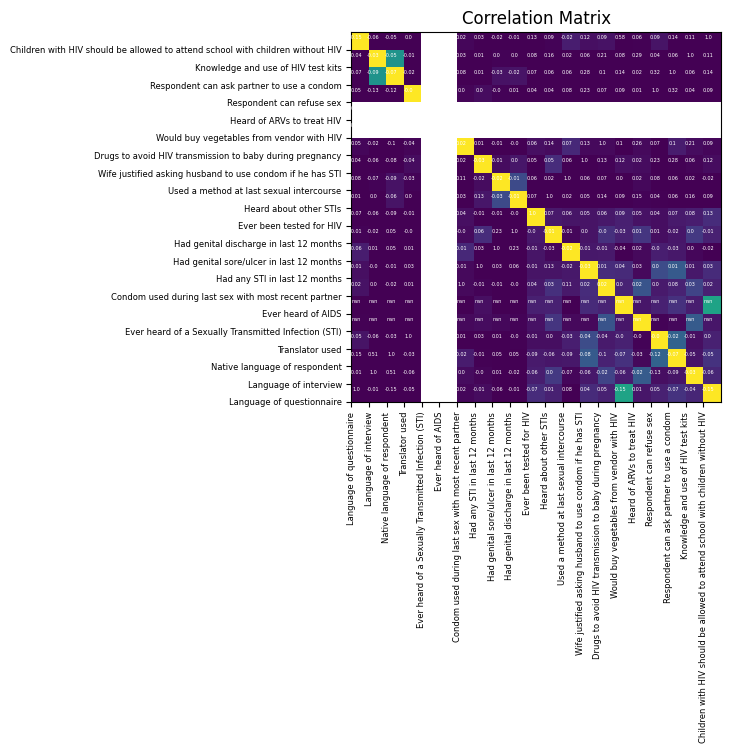

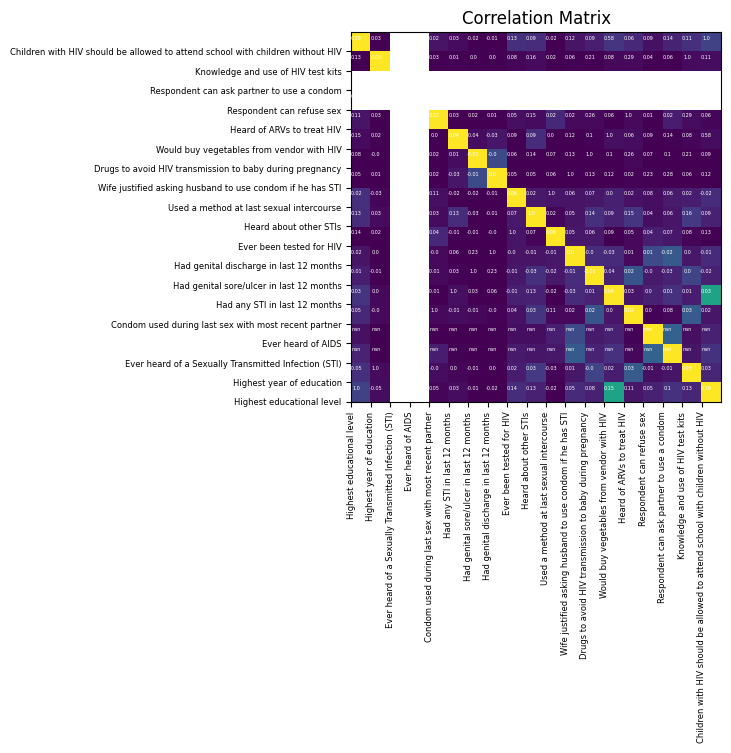

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.io as pio

pio.renderers.default = "notebook"

code_df = pd.read_csv('Codes.csv')
survey_df = pd.read_csv('Dataset.csv')

codeList = code_df["CASEID"].to_list()
codeDesc = code_df["Case Identification"].to_list()
codeDict = dict(zip(codeList, codeDesc))

pd.set_option("future.no_silent_downcasting", True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

survey_df.rename(columns=codeDict, inplace=True)

survey_df.replace(" ", np.nan, inplace=True)
survey_df.dropna(axis=1, thresh=13911, inplace=True)
survey_df.dropna(axis=0, how='any', inplace=True)

irrelevantColumns = [
    'Country code and phase', 
    'Cluster number', 
    'Household number', 
    "Respondent's line number", 
    'Ultimate area unit', 
    "Women's individual sample weight (6 decimals)", 
    'Month of interview', 
    'Year of interview', 
    'Date of interview (CMC)', 
    'Date of interview Century Day Code (CDC)', 
    'Date of birth (CMC)', 
    'Age in 5-year groups', 
    'Completeness of age information', 
    'Result of individual interview', 
    'Day of interview', 
    'CMC start of calendar', 
    'Row of month of interview', 
    'Length of calendar', 
    'Number of calendar columns',
    'Ever-married sample',
    'Primary sampling unit', 
    'Sample strata for sampling errors', 
    'Stratification used in sample design', 
    'Number of visits', 
    'Interviewer identification', 
    'Field supervisor', 
    'Line number of husband', 
    'Cluster altitude in meters', 
    'Household selected for hemoglobin', 
    'Selected for Domestic Violence module',
    'Years lived in place of residence', 
    'Team number', 
    'Team supervisor'
]

survey_df.drop(columns=irrelevantColumns, inplace=True)

survey_df = survey_df.loc[:,~survey_df.columns.duplicated()].copy()
survey_df = survey_df.reset_index(drop=True)
survey_df = survey_df.astype(str).astype(int)

birthdate_df = survey_df.iloc[:, 0:3]
residence_df = survey_df.iloc[:, 3:5]
langauge_df = survey_df.iloc[:, 5:9]
education_df = survey_df.iloc[:, 9:11]

perception_df_1 = survey_df.iloc[:, 11:17]
perception_df_2 = survey_df.iloc[:, 20:26]
perception_df_3 = survey_df.iloc[:, 27:32]

perception_df_temp = pd.merge(perception_df_1, perception_df_2, left_index=True, right_index=True)
perception_df = pd.merge(perception_df_temp, perception_df_3, left_index=True, right_index=True)

perception_df.replace(8, 0, inplace=True)
perception_df.replace(2, 1, inplace=True)
perception_df.replace(3, 1, inplace=True)

birth_perc = pd.merge(birthdate_df, perception_df, left_index=True, right_index=True)
resi_perc = pd.merge(residence_df, perception_df, left_index=True, right_index=True)
lang_perc = pd.merge(langauge_df, perception_df, left_index=True, right_index=True)
educ_perc = pd.merge(education_df, perception_df, left_index=True, right_index=True)

print()
print(perception_df.shape)
print()

def heat_map_test(corr, corr_len):
    plt.imshow(corr, vmin=0, vmax=1, extent=[0, corr_len, 0, corr_len]) 
    for i in range(corr_len): 
        for j in range(corr_len): 
            plt.annotate(str(round(corr.values[i][j], 2)), xy=(j+0.25, i+0.7), 
                        ha='center', va='center', color='white', fontsize = 3.5) 

    plt.xticks(range(len(corr.columns)), 
            corr.columns, rotation=90, fontsize = 6) 
    plt.yticks(range(len(corr.columns)), 
            corr.columns, fontsize = 6) 


    plt.title( "Correlation Matrix" ) 
    return plt.show() 

birth_perc_corr = birth_perc.corr()
resi_perc_corr = resi_perc.corr()
lang_perc_corr = lang_perc.corr()
educ_perc_corr = educ_perc.corr()

heat_map_test(birth_perc_corr, len(birth_perc_corr.columns))
heat_map_test(resi_perc_corr, len(resi_perc_corr.columns))
heat_map_test(lang_perc_corr, len(lang_perc_corr.columns))
heat_map_test(educ_perc_corr, len(educ_perc_corr.columns))